In [1]:
import zipfile as zf
files = zf.ZipFile("archive.zip", 'r')
files.extractall('directory to extract')
files.close()

In [2]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import glob
import os
import matplotlib.pyplot as plt

In [3]:
# importing libraries
import numpy as np # For numerical computation
import pandas as pd # Data manipulation
import seaborn as sns # plotting
import scipy.io # reading matlab files in python
from scipy import signal #signal processing
from scipy.fftpack import fft, dct #signal processing

from sklearn.linear_model import LinearRegression #linear regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split # cross validation split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt # For plotting graphs(Visualization)

import os # system-wide functions


In [4]:
sample_file = scipy.io.loadmat(f'archive/part_1.mat')
print(f'sample_file Data type: {type(sample_file)}')
print(f'sample_file keys:\n{sample_file.keys()}')

sample_file Data type: <class 'dict'>
sample_file keys:
dict_keys(['__header__', '__version__', '__globals__', 'p'])


In [5]:
# Loading a sample .mat file to understand the data dimensions
test_sample = scipy.io.loadmat(f'archive/part_1.mat')['p']
print(f'test_sample Data type: {type(test_sample)}')
print(f'test_sample shape/dimensions: {test_sample.shape}')

test_sample Data type: <class 'numpy.ndarray'>
test_sample shape/dimensions: (1, 1000)


In [6]:
print(f"Total Samples: {len(test_sample[0])}")
print(f"Number of readings in each sample(column): {len(test_sample[0][0])}")
print(f"Number of samples in each reading(ECG): {len(test_sample[0][0][2])}")

temp_mat = test_sample[0, 999]
temp_length = temp_mat.shape[1]
sample_size = 125


print(temp_length)
print((int)(temp_length/sample_size))

Total Samples: 1000
Number of readings in each sample(column): 3
Number of samples in each reading(ECG): 61000
9000
72


In [7]:
temp_mat.shape

(3, 9000)

In [8]:
sample_size = 125
ppg = []
for i in range(1000):
    temp_mat = test_sample[0, i]
    temp_length = temp_mat.shape[1]
    for j in range((int)(temp_length/sample_size)):
        temp_ppg = temp_mat[0, j*sample_size:(j+1)*sample_size]
        ppg.append(temp_ppg)

In [9]:
ecg = []
bp = []
sbp = [] #Systolic Blood Pressure
dbp = [] #Diastolic Blood Pressue
size = 125 #sample size

for i in range(1000):
    temp_mat = test_sample[0, i]
    temp_length = temp_mat.shape[1]
    for j in range((int)(temp_length/sample_size)):
        temp_ecg = temp_mat[2, j*size:(j+1)*size]
        temp_bp = temp_mat[1, j*size:(j+1)*size]
        
        max_value = max(temp_bp)
        min_value = min(temp_bp)
        
        sbp.append(max_value)
        dbp.append(min_value)
        ecg.append(temp_ecg)
        bp.append(temp_bp)

In [10]:
# Reshaping the ecg, ppg and bp signal data into column vectors
ppg, ecg, bp = np.array(ppg).reshape(-1,1), np.array(ecg).reshape(-1,1), np.array(bp).reshape(-1,1)
sbp, dbp = np.array(sbp).reshape(-1,1), np.array(dbp).reshape(-1,1)
print(f'PPG_shape: {ppg.shape}\n ECG_shape: {ecg.shape}\n BP_shape: {bp.shape}')
print(f'Systolic-BP_shape: {sbp.shape},\n Diastolic-BP_shape: {dbp.shape}')

PPG_shape: (32061000, 1)
 ECG_shape: (32061000, 1)
 BP_shape: (32061000, 1)
Systolic-BP_shape: (256488, 1),
 Diastolic-BP_shape: (256488, 1)


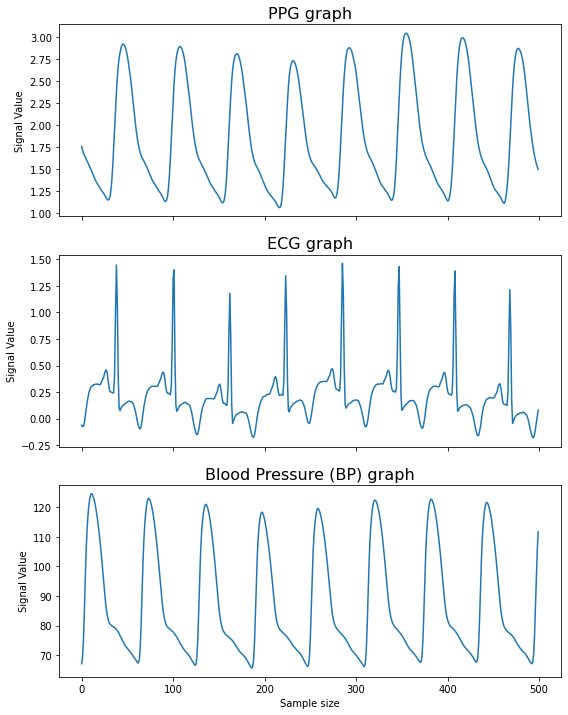

In [11]:
##plotting sample ppg, ecg and bp signals
##using a sample size of 500
fig, ax = plt.subplots(3,1, figsize=(9,12), sharex=True)

ax[0].set_title('PPG graph', fontsize=16)
ax[0].set_ylabel('Signal Value')
ax[0].plot(ppg[:500])

ax[1].set_title('ECG graph', fontsize=16)
ax[1].set_ylabel('Signal Value')
ax[1].plot(ecg[:500])

ax[2].set_title('Blood Pressure (BP) graph', fontsize=16)
ax[2].set_ylabel('Signal Value')
ax[2].set_xlabel('Sample size')
ax[2].plot(bp[:500])

In [12]:
Map=(sbp+ (2*dbp))/3

Text(0, 0.5, 'Map')

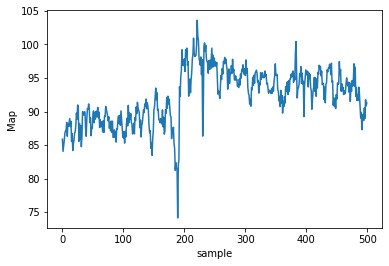

In [13]:
plt.plot(Map[:500])
plt.xlabel("sample")
plt.ylabel("Map")

In [14]:
s=0
size=15*125
e=15*125
necgs=[]
nbps=[]
while(e<len(ecg)):
  necgs.append(ecg[s:e])
  nbps.append(bp[s:e])
  s+=size
  e+=size


In [15]:
necgs=np.array(necgs)
nbps=np.array(nbps)

In [16]:
necgs.shape

(17099, 1875, 1)

In [17]:
nbps.shape

(17099, 1875, 1)

In [18]:
nbps=nbps.reshape(17099,1875)

In [19]:
nbps.shape

(17099, 1875)

In [20]:
necgs=necgs.reshape(17099,1875)

In [21]:
necgs.shape

(17099, 1875)

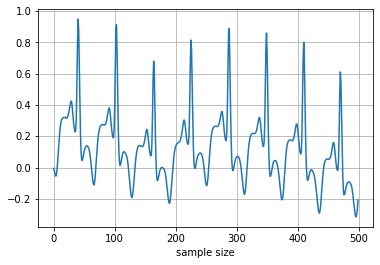

In [22]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 500.0
    lowcut = 0.1
    highcut = 50.0
    y = butter_bandpass_filter(necgs[0], lowcut, highcut, fs, order=2)
    plt.plot(y[:500])
    plt.xlabel('sample size')
    plt.grid(True)

    plt.show()


run()

In [23]:
fs = 500.0
lowcut = 0.1
highcut = 50.0
necgs_new=[]
for i in range(len(necgs)):
  necgs_new.append(butter_bandpass_filter(necgs[i], lowcut, highcut, fs, order=2))

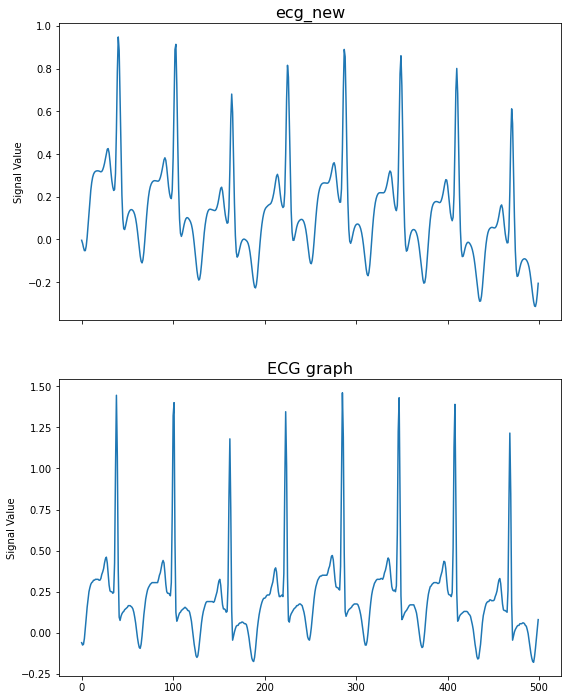

In [24]:
fig, ax = plt.subplots(2,1, figsize=(9,12), sharex=True)

ax[0].set_title('ecg_new', fontsize=16)
ax[0].set_ylabel('Signal Value')
ax[0].plot(necgs_new[0][:500])

ax[1].set_title('ECG graph', fontsize=16)
ax[1].set_ylabel('Signal Value')
ax[1].plot(necgs[0][:500])

In [25]:
pip install neurokit2

Note: you may need to restart the kernel to use updated packages.


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal
import scipy.stats
import neurokit2 as nk

In [27]:
necgs_new=np.array(necgs_new)

In [28]:
necgs_new.shape

(17099, 1875)

In [29]:
for i in range(len(necgs_new)):
  necgs_new[i]=necgs_new[i].reshape(len(necgs_new[i]))

In [30]:
for i in range(len(nbps)):
  nbps[i]=nbps[i].reshape(len(nbps[i]))

In [31]:
necgs_new.shape

(17099, 1875)

In [32]:
nbps.shape

(17099, 1875)

In [33]:
final_ecg=[]
final_bp=[]
for i in range(len(necgs_new)):
  _, rpeaks = nk.ecg_peaks(necgs_new[i], sampling_rate=50)
  a=[]
  for j in rpeaks.values():
    a.append(j)
  peak=[]
  peak=a[0]
  avg_d=0
  for j in range(1,len(peak)):
    avg_d+=peak[j]-peak[j-1]

  if len(peak)<=1:
    continue
  avg_d=avg_d/(len(peak)-1)
  flag=1
  for j in range(1,len(peak)):
    d=peak[j]-peak[j-1]
    if(d>avg_d+(0.1*avg_d)):
      flag=0
      break
    if(d<avg_d-(0.1*avg_d)):
      flag=0
      break
  if(flag==1):
    final_bp.append(nbps[i])
    final_ecg.append(necgs_new[i])





In [34]:
len(final_bp)

6990

In [35]:
final_bp=np.array(final_bp)
final_ecg=np.array(final_ecg)

In [36]:
final_bp.shape

(6990, 1875)

In [37]:
final_ecg.shape

(6990, 1875)

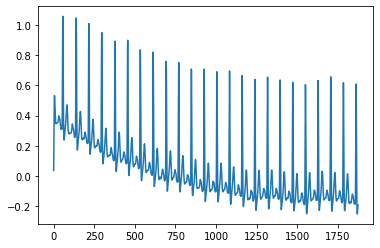

In [38]:
plt.plot(final_ecg[6000])

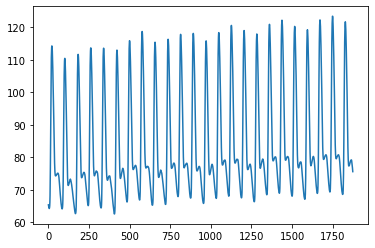

In [39]:
plt.plot(final_bp[6000])

In [40]:
from matplotlib.patches import BoxStyle
all_peaks=[]
corr_bp=[]
for i in range(len(final_ecg)):
  e=final_ecg[i]
  bx=final_bp[i]
  _, rpeaks = nk.ecg_peaks(e, sampling_rate=50)
  a=[]
  for j in rpeaks.values():
    a.append(j)
  peak=[]
  peak=a[0]
  ind=0
  while ind+3<len(peak):
    jx=peak[ind]
    k=peak[ind+3]
    temp=e[jx:k+1]
    b=bx[jx:k+1]
    all_peaks.append(temp)
    corr_bp.append(b)
    ind+=4


In [41]:
len(all_peaks)

32769

In [42]:
all_peaks=np.array(all_peaks)
corr_bp=np.array(corr_bp)

In [43]:
all_peaks.shape

(32769,)

In [44]:
from scipy import signal
from scipy.fft import fft, fftfreq, fftshift
import scipy.fft
f=scipy.signal.resample(all_peaks[1], 120)
b=scipy.signal.resample(corr_bp[1], 120)


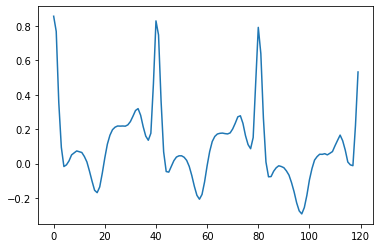

In [45]:
plt.plot(f)

In [46]:
f_peak=[]
f_bp=[]
for i in range(len(all_peaks)):
    f=scipy.signal.resample(all_peaks[i], 120)
    b=scipy.signal.resample(corr_bp[i], 120)
    f_peak.append(f);
    f_bp.append(b)


In [47]:
f_peak=np.array(f_peak)
f_bp=np.array(f_bp)

In [48]:
f_peak.shape

(32769, 120)

In [49]:
f_bp.shape

(32769, 120)

In [50]:
peak_sbp=[]
peak_dbp=[]
for i in f_bp:
  peak_sbp.append(max(i))
  peak_dbp.append(min(i))

In [51]:
peak_sbp=np.array(peak_sbp)
peak_dbp=np.array(peak_dbp)

In [52]:
peak_sbp.shape

(32769,)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(f_peak,peak_sbp, test_size=0.33)

In [54]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

In [55]:
def rmse(y_true, y_pred):
    """Computes the Root Mean Squared Error (RMSE)."""
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [56]:
def Model(input_dim, activation, num_class):
    model = Sequential()

    model.add(Dense(1024, input_dim = input_dim))
    model.add(Activation(activation))
    model.add(Dropout(0.5))

    model.add(Dense(512)) 
    model.add(Activation(activation))
    model.add(Dropout(0.5))

    model.add(Dense(64))    
    model.add(Activation(activation))
    model.add(Dropout(0.25))

    model.add(Dense(num_class))    
    model.add(Activation('linear'))
    
    model.compile(loss='Huber',
                  optimizer=optimizers.Adam(lr = 0.001),
                  metrics=['MeanAbsoluteError']
                 )
    return model

In [57]:
input_dim = X_train.shape[1]
activation = 'relu'
classes = 1
model = Model(input_dim=input_dim, activation=activation, num_class=classes)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              123904    
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                3

In [58]:
history = model.fit(X_train, # using the first 1million rows for speed.
                    y_train.squeeze(),
                    epochs=100,
                    batch_size=128,
                    verbose = 1
                   )

Epoch 1/100
172/172 [==============================] - 2s 7ms/step - loss: 38.8471 - mean_absolute_error: 39.3435
Epoch 2/100
172/172 [==============================] - 1s 7ms/step - loss: 20.5215 - mean_absolute_error: 21.0161
Epoch 3/100
172/172 [==============================] - 1s 7ms/step - loss: 20.2044 - mean_absolute_error: 20.6992
Epoch 4/100
172/172 [==============================] - 1s 7ms/step - loss: 19.6768 - mean_absolute_error: 20.1718
Epoch 5/100
172/172 [==============================] - 1s 7ms/step - loss: 19.4338 - mean_absolute_error: 19.9281
Epoch 6/100
172/172 [==============================] - 1s 7ms/step - loss: 19.4146 - mean_absolute_error: 19.9089
Epoch 7/100
172/172 [==============================] - 1s 7ms/step - loss: 19.1670 - mean_absolute_error: 19.6616
Epoch 8/100
172/172 [==============================] - 1s 7ms/step - loss: 19.0238 - mean_absolute_error: 19.5185
Epoch 9/100
172/172 [==============================] - 1s 7ms/step - loss: 18.8467 - mea

In [59]:
#Predicting on the test set using the nn(neural network) model
val_predictions_sbp = model.predict(X_test)
error = rmse(y_test, val_predictions_sbp)
print(f'Neural Net RMSE: {error}')

338/338 [==============================] - 1s 2ms/step
Neural Net RMSE: 12.757742688569234


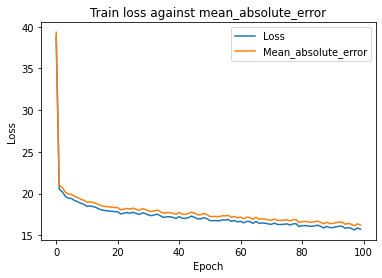

In [60]:
plt.title('Train loss against mean_absolute_error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.legend(['Loss', 'Mean_absolute_error'])


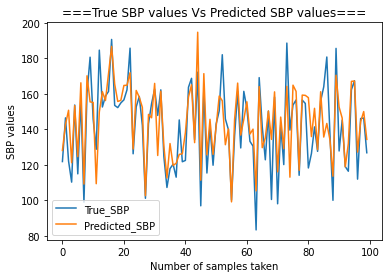

In [61]:

# Visualize predicted BP and the True BP
plt.title("===True SBP values Vs Predicted SBP values===")
plt.xlabel('Number of samples taken')
plt.ylabel('SBP values')
plt.plot(y_test[:100]) #only plotting 100 samples
plt.plot(val_predictions_sbp[:100])
plt.legend(['True_SBP', 'Predicted_SBP'])

#DBP



In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(f_peak,peak_dbp, test_size=0.33)

In [63]:
input_dim = X_train.shape[1]
activation = 'relu'
classes = 1
model = Model(input_dim=input_dim, activation=activation, num_class=classes)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              123904    
                                                                 
 activation_4 (Activation)   (None, 1024)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 activation_5 (Activation)   (None, 512)               0         
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [64]:
history = model.fit(X_train, # using the first 1million rows for speed.
                    y_train.squeeze(),
                    epochs=100,
                    batch_size=128,
                    verbose = 1
                   )

Epoch 1/100
172/172 [==============================] - 2s 7ms/step - loss: 17.2425 - mean_absolute_error: 17.7350
Epoch 2/100
172/172 [==============================] - 1s 7ms/step - loss: 9.4098 - mean_absolute_error: 9.8974
Epoch 3/100
172/172 [==============================] - 1s 7ms/step - loss: 8.9826 - mean_absolute_error: 9.4702
Epoch 4/100
172/172 [==============================] - 1s 7ms/step - loss: 8.8957 - mean_absolute_error: 9.3836
Epoch 5/100
172/172 [==============================] - 1s 7ms/step - loss: 8.7848 - mean_absolute_error: 9.2724
Epoch 6/100
172/172 [==============================] - 1s 7ms/step - loss: 8.6987 - mean_absolute_error: 9.1859
Epoch 7/100
172/172 [==============================] - 1s 7ms/step - loss: 8.5231 - mean_absolute_error: 9.0100
Epoch 8/100
172/172 [==============================] - 1s 7ms/step - loss: 8.5555 - mean_absolute_error: 9.0428
Epoch 9/100
172/172 [==============================] - 1s 7ms/step - loss: 8.4739 - mean_absolute_erro

In [65]:
#Predicting on the test set using the nn(neural network) model
val_predictions_dbp = model.predict(X_test)
error = rmse(y_test, val_predictions_dbp)
print(f'Neural Net RMSE: {error}')

338/338 [==============================] - 1s 2ms/step
Neural Net RMSE: 6.338174902260865


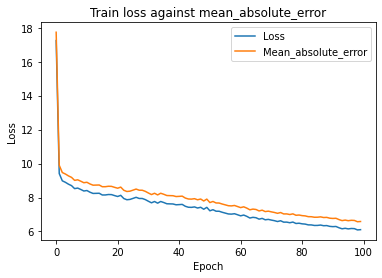

In [66]:
plt.title('Train loss against mean_absolute_error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.legend(['Loss', 'Mean_absolute_error'])



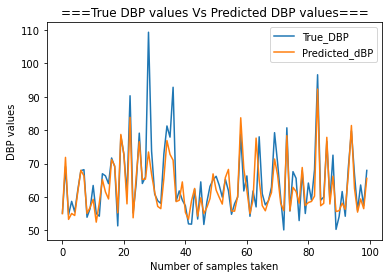

In [67]:
# Visualize predicted BP and the True BP
plt.title("===True DBP values Vs Predicted DBP values===")
plt.xlabel('Number of samples taken')
plt.ylabel('DBP values')
plt.plot(y_test[:100]) #only plotting 100 samples
plt.plot(val_predictions_dbp[:100])
plt.legend(['True_DBP', 'Predicted_dBP'])

In [68]:
health_condition = []
category = ["Normal", "Prehypertension", "Hypertension"]
for i in range(len(val_predictions_sbp)):
  if (val_predictions_sbp[i] <= 90 or val_predictions_dbp[i] <= 60):
    health_condition.append(category[0])
  if ((val_predictions_sbp[i] >= 90 and val_predictions_sbp[i] < 120) and (val_predictions_dbp[i] >= 60 and val_predictions_dbp[i] < 79)):
    health_condition.append(category[0])
  if ((val_predictions_sbp[i] >= 120 and val_predictions_sbp[i] < 140) or (val_predictions_dbp[i] >= 80 and val_predictions_dbp[i] < 90)):
    health_condition.append(category[1])
  if ((val_predictions_sbp[i] >= 140 and val_predictions_sbp[i] < 160) or (val_predictions_dbp[i] >= 90 and val_predictions_dbp[i] < 100)):
    health_condition.append(category[2])
  if (val_predictions_sbp[i] >= 160 or val_predictions_dbp[i] >= 100):
    health_condition.append(category[2])
  if (val_predictions_sbp[i] >= 140 and val_predictions_dbp[i] < 90):
    health_condition.append(category[2])
  if (val_predictions_sbp[i] >= 180 or val_predictions_dbp[i] >= 110):
    health_condition.append(category[2])

In [69]:
health_condition = np.array(health_condition)
print(health_condition)

['Normal' 'Prehypertension' 'Hypertension' ... 'Hypertension'
 'Hypertension' 'Hypertension']
